In [192]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.signal import butter, filtfilt
from scipy.ndimage import gaussian_filter

In [193]:
df = pd.read_csv('DataBase.csv')
df.head()

,ax,ay,az,gx,gy,gz,time
0,489,-509,-441,2768,-556,15832,0.001803
1,535,-516,-452,2888,-576,15840,0.004631
2,589,-516,-451,2812,-556,15740,0.007350
3,778,-492,-398,2916,-420,15768,0.020295
4,772,-438,-403,2968,-436,15824,0.022999


# ADICIONANDO OS FILTROS

In [194]:
def getStates(df, key, var='y', n=10):
    table = df.copy() 
    table[f'{var}[n-0]'] = table[key]

    for i in range(1, n):
        table[f'{var}[n-{i}]'] = table[key].shift(i)

    table.fillna(0, inplace=True)
    columns = [f'{var}[n-0]'] + [f'{var}[n-{i}]' for i in range(1, n)]
    return table[columns]

size = 50

In [195]:
order = 2           # Ordem do filtro
cutoff_freq = 0.05  # Frequência de corte (ajuste conforme seu sinal)
b, a = butter(order, cutoff_freq, btype='low', analog=False)

In [196]:
yData = filtfilt(b, a, df.gx)
xData = getStates(df, 'gx', 'y', size)
xData.head()

,y[n-0],y[n-1],y[n-2],y[n-3],y[n-4],y[n-5],y[n-6],y[n-7],y[n-8],y[n-9],...,y[n-40],y[n-41],y[n-42],y[n-43],y[n-44],y[n-45],y[n-46],y[n-47],y[n-48],y[n-49]
0,2768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2888,2768.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2812,2888.0,2768.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2916,2812.0,2888.0,2768.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2968,2916.0,2812.0,2888.0,2768.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# MODELO PREDITIVO

In [197]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

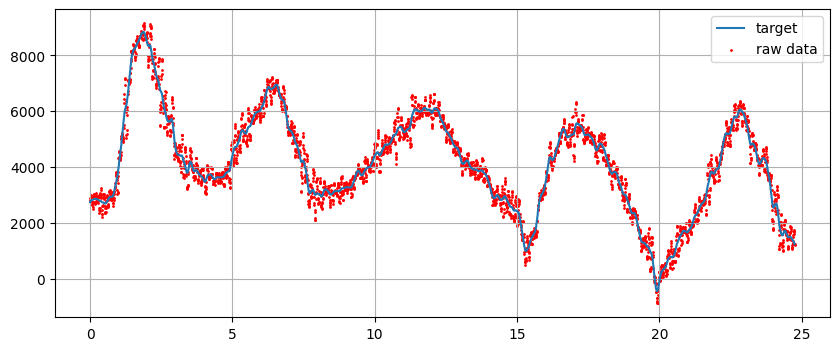

In [198]:
plt.figure(figsize=(10, 4))
plt.plot(df.time, yData, label='target')
plt.scatter(df.time, df.gx, s=1, color='red', label='raw data')
plt.legend(), plt.grid()
plt.show()

### REGRESSÃO LINEAR

score: 0.995


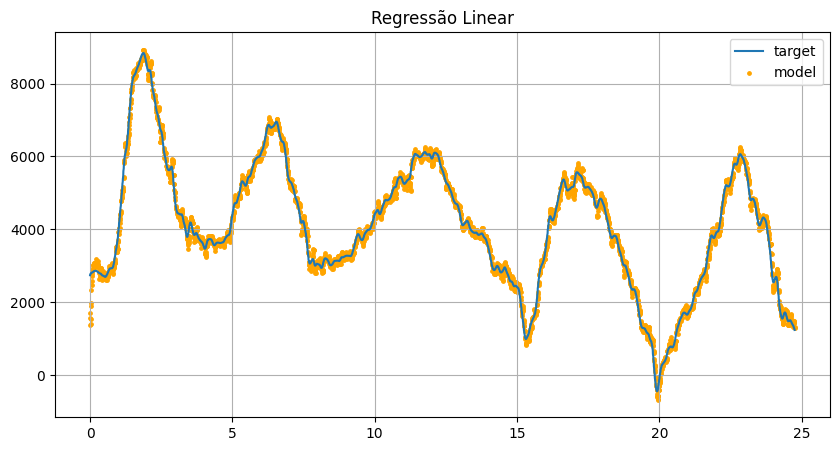

In [199]:
def linearRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = LinearRegression()
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = linearRegression(xData, yData)
print(f'score: {score:.3f}')

yModel = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(df.time, yData, label='target')
plt.scatter(df.time, yModel, color='orange', label='model', s=6)
plt.legend(), plt.grid(), plt.title('Regressão Linear')
plt.show()

### REGRESSÃO POLINOMIAL

score: 0.981


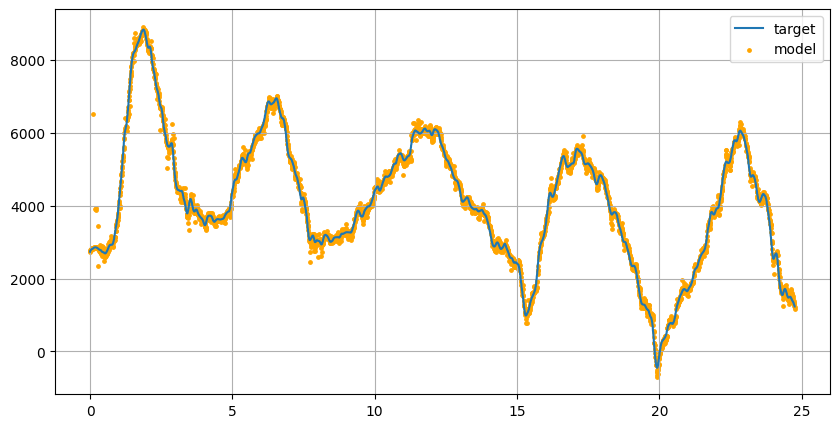

In [200]:
def polinomialRegression(xData, yData, degree=2):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = polinomialRegression(xData, yData, degree=2)
print(f'score: {score:.3f}')

yModel = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(df.time, yData, label='target')
plt.scatter(df.time, yModel, color='orange', label='model', s=6)
plt.legend(), plt.grid(), 
plt.show()

### ÁRVORE DE DECISÃO

score: 0.991


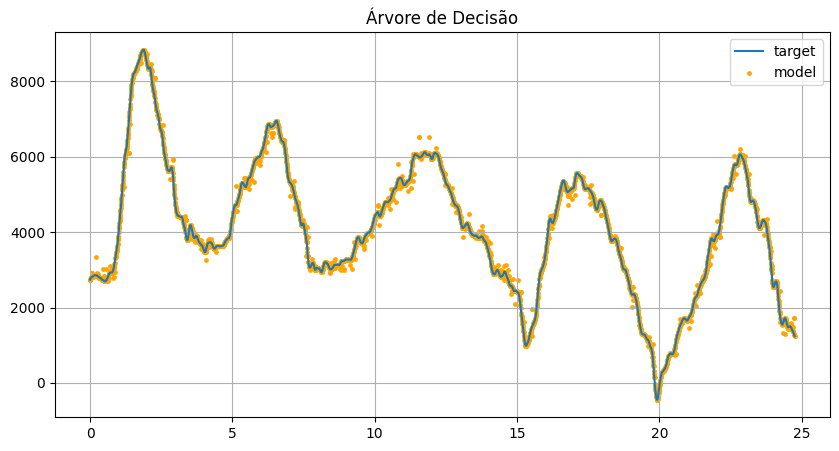

In [201]:
def decisionTreeRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = DecisionTreeRegressor()
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = decisionTreeRegression(xData, yData)
print(f'score: {score:.3f}')

yModel = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(df.time, yData, label='target')
plt.scatter(df.time, yModel, color='orange', label='model', s=6)
plt.legend(), plt.grid(), plt.title('Árvore de Decisão')
plt.show()

### RANDOM FOREST

score: 0.995


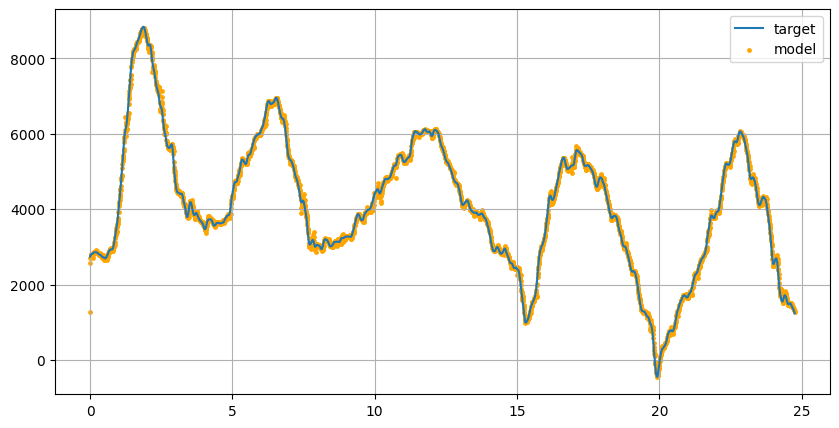

In [202]:
def randomForestRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = RandomForestRegressor()
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = randomForestRegression(xData, yData)
print(f'score: {score:.3f}')

yModel = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(df.time, yData, label='target')
plt.scatter(df.time, yModel, color='orange', label='model', s=6)
plt.legend(), plt.grid()
plt.show()

### SUPORTE VETORIAL PARA REGRESSÃO (SVR)

score: 0.368


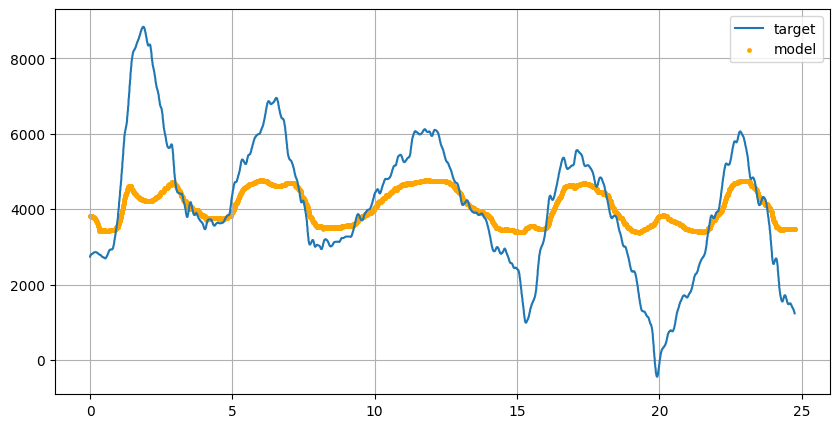

In [203]:
def supportVectorRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = SVR(kernel='rbf')  # kernel pode ser 'linear', 'poly', ou 'rbf'
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = supportVectorRegression(xData, yData)
print(f'score: {score:.3f}')

yModel = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(df.time, yData, label='target')
plt.scatter(df.time, yModel, color='orange', label='model', s=6)
plt.legend(), plt.grid(), 
plt.show()

### RIDGE REGRESSOR

score: 0.992


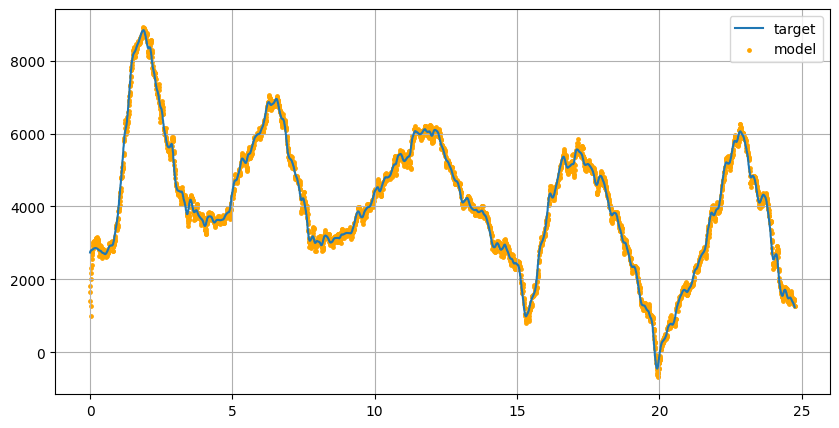

In [204]:
def ridgeRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = Ridge(alpha=1.0)  # Ajuste o parâmetro alpha para regularização
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = ridgeRegression(xData, yData)
print(f'score: {score:.3f}')

yModel = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(df.time, yData, label='target')
plt.scatter(df.time, yModel, color='orange', label='model', s=6)
plt.legend(), plt.grid(), 
plt.show()

### GRADIENT BOOSTER

score: 0.994


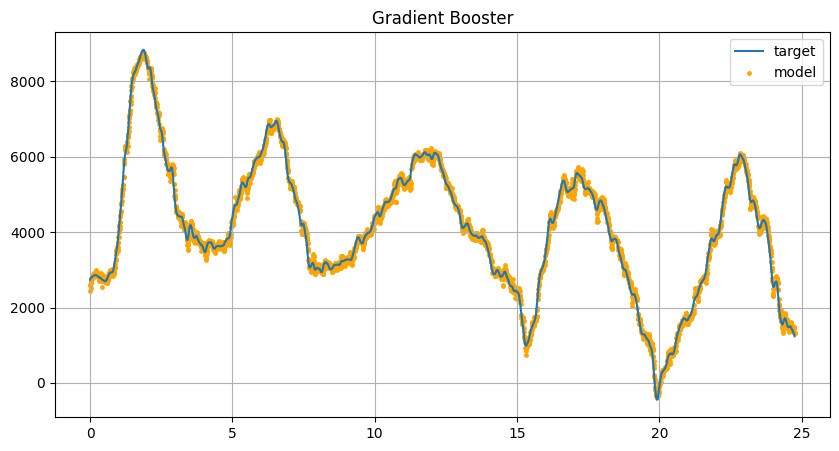

In [205]:
def gradientBoostingRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = gradientBoostingRegression(xData, yData)
print(f'score: {score:.3f}')

yModel = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(df.time, yData, label='target')
plt.scatter(df.time, yModel, color='orange', label='model', s=6)
plt.legend(), plt.grid(), plt.title('Gradient Booster')
plt.show()

### K-NEAREST NEIGHBORS

score: 0.998


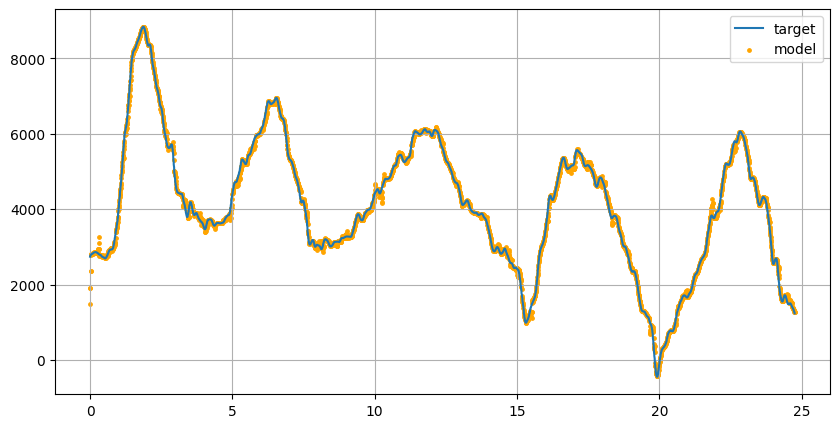

In [206]:
def knnRegression(xData, yData):
    xTreino, xTeste, yTreino, yTeste = train_test_split(xData, yData, test_size=0.2)
    model = KNeighborsRegressor(n_neighbors=5)  # Ajuste n_neighbors conforme necessário
    model.fit(xTreino, yTreino)
    yModel = model.predict(xTeste)
    score = metrics.r2_score(yTeste, yModel)
    return model, score


model, score = knnRegression(xData, yData)
print(f'score: {score:.3f}')

yModel = model.predict(xData)
plt.figure(figsize=(10, 5))
plt.plot(df.time, yData, label='target')
plt.scatter(df.time, yModel, color='orange', label='model', s=6)
plt.legend(), plt.grid(), 
plt.show()

# TESTANDO COM NOVOS DADOS

In [207]:
class StatesUpdater:
    states  = None
    initial = 0
    size    = 0

    def __init__(self, size, initial=0):
        self.initial = initial
        self.size    = size
        self.states  = initial * np.ones(size)
        
    def update(self, value):
        for i in range(self.size-1, 0, -1):
            self.states[i] = self.states[i-1]

        self.states[0] = value
        return self.states
    

states = StatesUpdater(3)
for i in range(1, 5): print(states.update(i))

[1. 0. 0.]
[2. 1. 0.]
[3. 2. 1.]
[4. 3. 2.]


In [208]:
df = pd.read_csv('DataBase.csv')
df.head()

,ax,ay,az,gx,gy,gz,time
0,489,-509,-441,2768,-556,15832,0.001803
1,535,-516,-452,2888,-576,15840,0.004631
2,589,-516,-451,2812,-556,15740,0.007350
3,778,-492,-398,2916,-420,15768,0.020295
4,772,-438,-403,2968,-436,15824,0.022999


In [209]:
columns = xData.columns
columns

Index(['y[n-0]', 'y[n-1]', 'y[n-2]', 'y[n-3]', 'y[n-4]', 'y[n-5]', 'y[n-6]',
       'y[n-7]', 'y[n-8]', 'y[n-9]', 'y[n-10]', 'y[n-11]', 'y[n-12]',
       'y[n-13]', 'y[n-14]', 'y[n-15]', 'y[n-16]', 'y[n-17]', 'y[n-18]',
       'y[n-19]', 'y[n-20]', 'y[n-21]', 'y[n-22]', 'y[n-23]', 'y[n-24]',
       'y[n-25]', 'y[n-26]', 'y[n-27]', 'y[n-28]', 'y[n-29]', 'y[n-30]',
       'y[n-31]', 'y[n-32]', 'y[n-33]', 'y[n-34]', 'y[n-35]', 'y[n-36]',
       'y[n-37]', 'y[n-38]', 'y[n-39]', 'y[n-40]', 'y[n-41]', 'y[n-42]',
       'y[n-43]', 'y[n-44]', 'y[n-45]', 'y[n-46]', 'y[n-47]', 'y[n-48]',
       'y[n-49]'],
      dtype='object')

In [210]:
states = StatesUpdater(size)
yData   = []

for i, row in df.iterrows():
    xData  = list(states.update(row['data'])) 
    xData  = pd.DataFrame([xData], columns=columns)
    yData.append(model.predict(xData)[0])


plt.figure(figsize=(10, 5))
plt.plot(df.time, yModel, label='model')
plt.plot(df.time, yData, label='raw model')
plt.legend(), plt.grid(), 
plt.show()

KeyError: 'data'